# Hands on neural network

## Neural network with Tensorflow : Face recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [2]:
# 2 different target classes
np.unique(faces.target)

array([0, 1])

Let's visualize some faces:

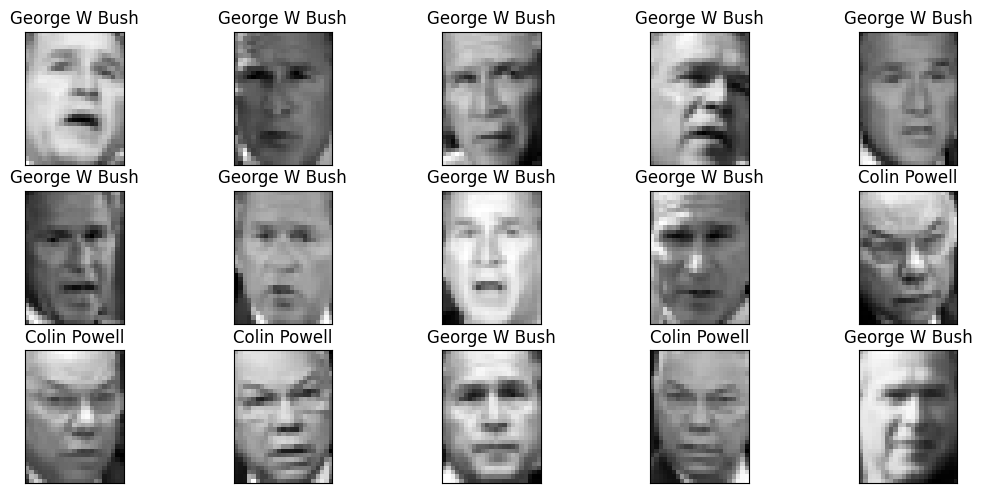

In [3]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

### Minimal preprocessing

In [4]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [5]:
y = faces.target
y.shape

(766,)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [7]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Simple model with two hidden layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

2022-09-19 03:44:20.009379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-09-19 03:44:20.498391: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-09-19 03:44:20.498417: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-19 03:44:20.564129: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2022-09-19 03:44:21.808415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-09-19 03:44:21.808718: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-09-19 03:44:21.808731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 20)                14280     


 dense_1 (Dense)             (None, 10)                210       


 dense_2 (Dense)             (None, 1)                 11        


Total params: 14,501


Trainable params: 14,501


Non-trainable params: 0


_________________________________________________________________


2022-09-19 03:44:23.215813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-09-19 03:44:23.216442: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-19 03:44:23.216508: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az38-889): /proc/driver/nvidia/version does not exist
2022-09-19 03:44:23.217304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20


 1/36 [..............................] - ETA: 19s - loss: 0.6227 - accuracy: 0.8125

36/36 [==============================] - 1s 1ms/step - loss: 0.4560 - accuracy: 0.7962


Epoch 2/20


 1/36 [..............................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8750

36/36 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9233


Epoch 3/20


 1/36 [..............................] - ETA: 0s - loss: 0.1226 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9547


Epoch 4/20


 1/36 [..............................] - ETA: 0s - loss: 0.2111 - accuracy: 0.9375

36/36 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9739


Epoch 5/20


 1/36 [..............................] - ETA: 0s - loss: 0.0394 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9861


Epoch 6/20


 1/36 [..............................] - ETA: 0s - loss: 0.0991 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9913


Epoch 7/20


 1/36 [..............................] - ETA: 0s - loss: 0.0295 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9948


Epoch 8/20


 1/36 [..............................] - ETA: 0s - loss: 0.0252 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9965


Epoch 9/20


 1/36 [..............................] - ETA: 0s - loss: 0.0138 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9965


Epoch 10/20


 1/36 [..............................] - ETA: 0s - loss: 0.0194 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9983


Epoch 11/20


 1/36 [..............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9965


Epoch 12/20


 1/36 [..............................] - ETA: 0s - loss: 0.0062 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000


Epoch 13/20


 1/36 [..............................] - ETA: 0s - loss: 0.0131 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000


Epoch 14/20


 1/36 [..............................] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000


Epoch 15/20


 1/36 [..............................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000


Epoch 16/20


 1/36 [..............................] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000


Epoch 17/20


 1/36 [..............................] - ETA: 0s - loss: 0.0200 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000


Epoch 18/20


 1/36 [..............................] - ETA: 0s - loss: 4.9544e-04 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000


Epoch 19/20


 1/36 [..............................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000


Epoch 20/20


 1/36 [..............................] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000


### Evaluate performance

In [10]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

1/6 [====>.........................] - ETA: 1s - loss: 0.2502 - accuracy: 0.9062

6/6 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.9167


[0.3076455593109131, 0.9166666865348816]

Is it good? What's our baseline?

In [11]:
pd.Series(y).value_counts()


1    530
0    236
dtype: int64

In [12]:
# Baseline score
530 / (530+236)

0.6919060052219321

### Let's check our predictions!

In [13]:
# Predicted probabilities
model.predict(scaler.transform(X_test))

1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 1ms/step


array([[9.99927521e-01],
       [3.00841331e-01],
       [9.99980092e-01],
       [3.36852972e-03],
       [6.23498894e-02],
       [9.99914467e-01],
       [2.60341447e-02],
       [9.99977410e-01],
       [2.28212721e-05],
       [9.99921203e-01],
       [9.96227562e-01],
       [9.99999344e-01],
       [3.47534806e-04],
       [9.99999285e-01],
       [6.79750085e-01],
       [9.99998271e-01],
       [9.99995947e-01],
       [9.99922276e-01],
       [1.00000000e+00],
       [9.99755025e-01],
       [9.94600117e-01],
       [9.99997377e-01],
       [9.99974132e-01],
       [1.32602990e-01],
       [9.99999523e-01],
       [9.99911368e-01],
       [9.99644697e-01],
       [1.67570800e-01],
       [9.80417907e-01],
       [9.99832153e-01],
       [2.34496996e-01],
       [9.99955952e-01],
       [9.99999881e-01],
       [6.44084867e-05],
       [9.98392284e-01],
       [2.59687868e-03],
       [9.99999404e-01],
       [9.95103061e-01],
       [2.61123350e-04],
       [9.05015588e-01],


## Linear regression with Tensorflow

## Logistic regression with Tensorflow